In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mapli(f,aa):
    return list(map(f,x))

def mapar(f,aa):
    return np.array(list(map(f,x)))

In [3]:
## module swap
''' swapRows(v,i,j).
          Swaps rows i and j of a vector or matrix [v].
          swapCols(v,i,j).
          Swaps columns of matrix [v].
'''
def swapRows(v,i,j):
    if len(v.shape) == 1:
        v[i],v[j] = v[j],v[i]
    else:
        v[[i,j],:] = v[[j,i],:]

def swapCols(v,i,j):
    v[:,[i,j]] = v[:,[j,i]]


def err(string):
    print(string)
    input('Press return to exit')
    sys.exit()
    

## module gaussPivot
''' x = gaussPivot(a,b,tol=1.0e-12).
          Solves [a]{x} = {b} by Gauss elimination with
          scaled row pivoting
'''
import numpy as np
#import swap
#import error
def gaussPivot(a,b,tol=1.0e-12):
    n = len(b)
  # Set up scale factors
    s = np.zeros(n)
    for i in range(n):
        s[i] = max(np.abs(a[i,:]))
    for k in range(0,n-1):
      # Row interchange, if needed
        p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k
        if abs(a[p,k]) < tol: error.err('Matrix is singular')
        if p != k:
            swapRows(b,k,p)
            swapRows(s,k,p)
            swapRows(a,k,p)
      # Elimination
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
    if abs(a[n-1,n-1]) < tol: error.err('Matrix is singular')
  # Back substitution
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    return b



## module polyFit
'''  c = polyFit(xData,yData,m).
    Returns coefficients of the polynomial
    p(x) = c[0] + c[1]x + c[2]xˆ2 +...+ c[m]xˆm
    that fits the specified data in the least
    squares sense.
    sigma = stdDev(c,xData,yData).
    Computes the std. deviation between p(x)
    and the data.
''' 
import numpy as np
import math
#from gaussPivot import *
def polyFit(xData,yData,m):
    a = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    s = np.zeros(2*m+1)
    for i in range(len(xData)):
        temp = yData[i]
        for j in range(m+1):
            b[j] = b[j] + temp
            temp = temp*xData[i]
        temp = 1.0
        for j in range(2*m+1):
            s[j] = s[j] + temp
            temp = temp*xData[i]
    
    
    for i in range(m+1):
        for j in range(m+1):
            a[i,j] = s[i+j]
    return gaussPivot(a,b)


def stdDev(c,xData,yData):
    def evalPoly(c,x):
        m = len(c) - 1
        p = c[m]
        for j in range(m):
            p = p*x + c[m-j-1]
        return p
    
    n = len(xData) - 1
    m = len(c) - 1
    sigma = 0.0
    for i in range(n+1):
        p = evalPoly(c,xData[i])
        sigma = sigma + (yData[i] - p)**2
    sigma = math.sqrt(sigma/(n - m))
    return sigma



## module plotPoly
''' plotPoly(xData,yData,coeff,xlab=’x’,ylab=’y’)
    Plots data points and the fitting
    polynomial defined by its coefficient
    array coeff = [a0, a1. ...]
    xlab and ylab are optional axis labels
'''
import numpy as np
import matplotlib.pyplot as plt
def plotPoly(xData,yData,coeff,xlab='x',ylab='y'):
    m = len(coeff)
    x1 = min(xData)
    x2 = max(xData)
    dx = (x2 - x1)/20.0
    x = np.arange(x1,x2 + dx/10.0,dx)
    y = np.zeros((len(x)))*1.0
    for i in range(m):
        y = y + coeff[i]*x**i

    plt.plot(xData,yData,'o',x,y,'-')
    plt.xlabel(xlab); plt.ylabel(ylab)
    plt.grid (True)
    plt.show()

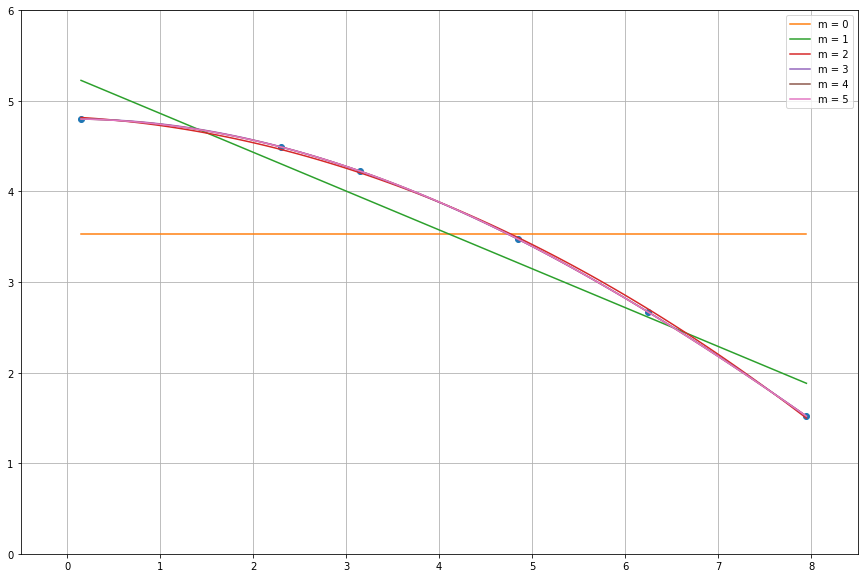

In [22]:
## Fitting Linear Forms
## Use polyFit(xData,yData,m)
## x   0.15   2.30   3.15   4.85   6.25   7.95
## y   4.79867  4.49013         4.2243   3.47313   2.66674  1.51909

xar = np.array([0.15,2.30,3.15,4.85,6.25,7.95])
yar = np.array([4.79867,4.49013,4.2243,3.47313,2.66674,1.51909])

x = np.linspace(max(xar),min(xar),100)
y = []

def f(x,m):
    c = polyFit(xar,yar,m)
    p = 0
    for i in range(len(c)):
        p += c[i]*(x**i)
    return p

plt.figure(figsize=[15,10])
plt.xlim(-0.5,8.5)
plt.ylim(0,6)

plt.plot(xar,yar,'o')

y = []
for m in range(6):
    y.append(mapar(lambda x:f(x,m),x))
    plt.plot(x,y[m],'-',label = 'm = '+str(m))
plt.grid()
plt.legend()
plt.show()

In [15]:
## Fitting a Straight Line, m = 1
## xData, yData
xar = np.array([0.15,2.30,3.15,4.85,6.25,7.95])
yar = np.array([4.79867,4.49013,4.2243,3.47313,2.66674,1.51909])

# S(a,b)
def lineFit(xData,yData):
    n = len(xData)
    xbar, ybar = sum(xData)/n, sum(yData)/n

#    s is sum of tol
#    s = 0
#    for i in range(n):
#        s += (y[i] - a - b * xData[i])**2

#   f = a + b*x
    sum0 = 0
    sum1 = 0
    for i in range(n):
        sum0 += yData[i]*(xData[i] - xbar)
        sum1 += xData[i]*(xData[i] - xbar)
#    b = sum(list(map(lambda x,y: y*(x-xbar),xData,yData)))/sum(mapli(lambda x:x*(x-xbar),xData))
    b = sum0/sum1
    a = ybar - xbar*b
    
    return a,b,xbar,ybar

In [18]:
a,b = polyFit(xar,yar,1)
a,b

(-0.050000000000000266, 1.0100000000000002)

In [20]:
a,b,xbar,ybar = lineFit(xar,yar)
a,b

(-0.04999999999999982, 1.01)

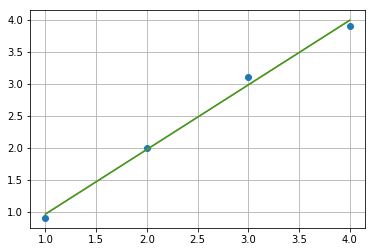

In [23]:
xar = np.array([1,2,3,4])
yar = np.array([0.9,2,3.1,3.9])
x = np.linspace(max(xar),min(xar),100)
c = lineFit(xar,yar)
d = polyFit(xar,yar,1)
y = mapar(lambda x:c[0] + c[1]*x,xar)
y1 = mapar(lambda x:d[0] + d[1]*x,xar)

plt.plot(xar,yar,'o',x,y,'-',x,y1,'-')
plt.grid()
plt.show()